# Research Question No. 4
What is the comparative performance of learning algorithms in long-lived bug prediction in FLOSS project? This research question aims to compare the accuracy of the long-lived bug prediction made by different classification algorithms. Here the algorithm with the best prediction capabilities is best fit in terms of balanced accuracy.

# 1. Setup environment.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import os 
import pandas as pd
import seaborn as sns 
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon

# Setup Matplotlib
plt.rc('figure', figsize=(15, 15))
plt.style.use('default')
SMALL_SIZE = 12
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title
%matplotlib inline 

# Setup Seaborn
sns.set_context("paper")
sns.set_style("ticks")


pd.set_option('display.max_columns', None)

bug_reports_eclipse_path = "../data/20200731_eclipse_bug_report_data.csv"
bug_reports_gcc_path     = "../data/20200731_gcc_bug_report_data.csv"
print("Setup complete")

Setup complete


# 2. Load data.

# 3. First Experiment

## Experimental parameters


| Parameter                  |         Value        |
|----------------------------|:--------------------:|
| Project                    |        Eclipse       |
| Algorithms                 | KNN, NB, NN, SVM, RF |
| Metrics                    | Accuracy |
| Features                   | Summary and Description |
| Number of Terms            |        100       |
| Balancing                  |        Unbalance, Smote   |
| Resampling                 |        Repeated CV 5 x 10       |
| Threshold                  |        365       |








Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## 3.1 Review the data

### Best Balanced Accuracy Scores

In [3]:
eclipse_metrics_in_train = pd.read_csv("../output/data/20200916_r4_1b_predict_long_lived_bug_train_final.csv", sep=",")
eclipse_metrics_in_train['sensitivity']  =  eclipse_metrics_in_train['tp']/(eclipse_metrics_in_train['tp']+eclipse_metrics_in_train['fn'])  
eclipse_metrics_in_train['specificity']  =  eclipse_metrics_in_train['tn']/(eclipse_metrics_in_train['tn']+eclipse_metrics_in_train['fp'])
eclipse_metrics_in_train['balanced_acc'] =  (eclipse_metrics_in_train['sensitivity']+eclipse_metrics_in_train['specificity'])/2
eclipse_metrics_in_train.fillna(0, inplace=True)

In [4]:
eclipse_metrics_in_train.sort_values('balanced_acc', ascending=False).head()

,tn,fp,fn,tp,Resample,acc,sensitivity,specificity,balanced_acc,project,classifier,balancing,resampling,metric,max_term,feature,hyper1,value1,hyper2,value2,hyper3,value3,seed
7509,1700,45,7,1664,Fold5.Rep02,"0,984777517564403",0.995811,0.974212,0.985011,eclipse,svm,smote,repeatedcv5x10,Accuracy,100,long_description,sigma,"0,03125",C,32,0,0,144
7534,1698,47,6,1665,Fold5.Rep07,"0,984484777517564",0.996409,0.973066,0.984738,eclipse,svm,smote,repeatedcv5x10,Accuracy,100,long_description,sigma,"0,03125",C,32,0,0,144
7517,1695,51,4,1666,Fold3.Rep04,"0,983899297423888",0.997605,0.970790,0.984198,eclipse,svm,smote,repeatedcv5x10,Accuracy,100,long_description,sigma,"0,03125",C,32,0,0,144
7502,1693,53,4,1667,Fold3.Rep01,"0,983318700614574",0.997606,0.969645,0.983626,eclipse,svm,smote,repeatedcv5x10,Accuracy,100,long_description,sigma,"0,03125",C,32,0,0,144
7539,1693,53,4,1666,Fold5.Rep08,"0,983313817330211",0.997605,0.969645,0.983625,eclipse,svm,smote,repeatedcv5x10,Accuracy,100,long_description,sigma,"0,03125",C,32,0,0,144


In [5]:
eclipse_metrics_in_train_summarized = eclipse_metrics_in_train.groupby(['classifier', 'feature', 'balancing', 'metric', 'max_term']).agg({'sensitivity': 'mean', 'specificity':'mean', 'balanced_acc': 'mean'})
eclipse_metrics_in_train_summarized = eclipse_metrics_in_train_summarized.reset_index()
eclipse_params_in_train = pd.read_csv("../output/data/20200914_r4_1a_predict_long_lived_bug_results_final.csv", sep=",")
eclipse_metrics_in_train_summarized=pd.merge(eclipse_metrics_in_train_summarized, eclipse_params_in_train[['classifier', 'feature', 'balancing', 'train_size', 'train_size_class_0', 'train_size_class_1', 'hyper1', 'value1', 'hyper2', 'value2', 'hyper3', 'value3']], on=['classifier', 'feature', 'balancing'])

In [6]:
pd.options.display.float_format = "{:,.3f}".format
eclipse_metrics_in_train_summarized.loc[eclipse_metrics_in_train_summarized.feature == "long_description", "feature"] = "description"
eclipse_metrics_in_train_summarized.loc[eclipse_metrics_in_train_summarized.feature == "short_description", "feature"] = "summary"
s = eclipse_metrics_in_train_summarized[['classifier', 'feature', 'balancing', 'max_term', 'train_size', 'train_size_class_0', 'train_size_class_1', 'balanced_acc', 'hyper1', 'value1', 'hyper2', 'value2', 'hyper3', 'value3']].sort_values('balanced_acc', ascending=False)
display(s)

,classifier,feature,balancing,max_term,train_size,train_size_class_0,train_size_class_1,balanced_acc,hyper1,value1,hyper2,value2,hyper3,value3
16,svm,description,smote,100,17081,8729,8352,0.981,sigma,0.031,C,32.000,NaN,0
12,rf,description,smote,100,17081,8729,8352,0.951,mtry,25.000,NaN,0.000,NaN,0
14,rf,summary,smote,100,14863,7651,7212,0.907,mtry,50.000,NaN,0.000,NaN,0
18,svm,summary,smote,100,14863,7651,7212,0.888,sigma,0.031,C,32.000,NaN,0
10,nn,summary,smote,100,14863,7651,7212,0.837,size,30.000,decay,0.500,NaN,0
2,knn,summary,smote,100,14863,7651,7212,0.802,k,5.000,NaN,0.000,NaN,0
0,knn,description,smote,100,17081,8729,8352,0.782,k,5.000,NaN,0.000,NaN,0
8,nn,description,smote,100,17081,8729,8352,0.744,size,20.000,decay,0.500,NaN,0
4,nb,description,smote,100,17081,8729,8352,0.533,fL,0.000,usekernel,0.000,adjust,0
6,nb,summary,smote,100,14863,7651,7212,0.524,fL,0.000,usekernel,0.000,adjust,0


In [7]:
s.to_latex('/tmp/eclipse_metrics_in_train_summarized.tex', index=False)
s.to_csv('/tmp/eclipse_metrics_in_train_summarized.csv', index=False)

In [8]:
def make_statistical_test(metrics_dataset):
    classifiers = ['knn', 'nb', 'nn', 'rf', 'svm']
    statistics  = pd.DataFrame(columns=['classifier1', 'mean1', 'classifier2', 'mean2', 'condition', 'direction'])
    alpha   = 0.05
    p       = 1.0
    for classifier1 in classifiers:
        sample1 = metrics_dataset.loc[:, (slice('balanced_acc'), classifier1)].values 
        mean1   = np.mean(sample1)
        for classifier2 in classifiers:
            sample2   = metrics_dataset.loc[:, (slice('balanced_acc'), classifier2)].values
            mean2     = np.mean(sample2)
            condition = True
            if (classifier1 != classifier2):
                stat, p   = wilcoxon(sample1.flatten(), sample2.flatten())
                condition = p > alpha
        
            statistics = statistics.append(
                {'classifier1': classifier1, 
                 'mean1': mean1, 
                 'classifier2': classifier2,
                 'mean2': mean2,
                 'condition': condition,
                 'direction': '$-$' if condition else '$\\leftarrow$' if mean1 > mean2 else '$\\uparrow$'}
                , ignore_index=True
            )
    return statistics
    

In [9]:
eclipse_metrics_in_train_by_fold = pd.pivot_table (eclipse_metrics_in_train, index=['Resample'], columns='classifier', values=['sensitivity', 'specificity', 'balanced_acc'])
statistics = make_statistical_test(eclipse_metrics_in_train_by_fold)
statistics.head()

,classifier1,mean1,classifier2,mean2,condition,direction
0,knn,0.646,knn,0.646,True,$-$
1,knn,0.646,nb,0.501,False,$\leftarrow$
2,knn,0.646,nn,0.646,True,$-$
3,knn,0.646,rf,0.716,False,$\uparrow$
4,knn,0.646,svm,0.717,False,$\uparrow$


In [10]:
s = statistics[['classifier1', 'classifier2', 'direction']]
s = s.pivot(index='classifier1', columns='classifier2', values='direction')
s.to_latex('/tmp/tabela_teste_estatistico.tex', index=True)
s

classifier2,knn,nb,nn,rf,svm
classifier1,,,,,
knn,$-$,$\leftarrow$,$-$,$\uparrow$,$\uparrow$
nb,$\uparrow$,$-$,$\uparrow$,$\uparrow$,$\uparrow$
nn,$-$,$\leftarrow$,$-$,$\uparrow$,$\uparrow$
rf,$\leftarrow$,$\leftarrow$,$\leftarrow$,$-$,$\uparrow$
svm,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$-$


# 4. Second Experiment (RQ4.2)

## 4.1 Parameters


| Parameter                  |         Value        |
|----------------------------|:--------------------:|
| Project                    |        Eclipse       |
| Algorithms                 |        SVM |
| Metrics                    | Accuracy |
| Features                   | Description |
| Number of Terms            |        100, 150, 200, 250, 300
|
| Balancing                  |        Smote   |
| Resampling                 |        Repeated CV 5 x 10       |
| Threshold                  |        365       |








Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## 4.2 Review Data

In [11]:
eclipse_metrics_in_train = pd.read_csv("../output/data/20200916_r4_2b_predict_long_lived_bug_train_final.csv", sep=",")
eclipse_metrics_in_train['sensitivity']  =  eclipse_metrics_in_train['tp']/(eclipse_metrics_in_train['tp']+eclipse_metrics_in_train['fn'])  
eclipse_metrics_in_train['specificity']  =  eclipse_metrics_in_train['tn']/(eclipse_metrics_in_train['tn']+eclipse_metrics_in_train['fp'])
eclipse_metrics_in_train['balanced_acc'] =  (eclipse_metrics_in_train['sensitivity']+eclipse_metrics_in_train['specificity'])/2
eclipse_metrics_in_train.tail(20)

,tn,fp,fn,tp,Resample,acc,sensitivity,specificity,balanced_acc,project,classifier,balancing,resampling,metric,max_term,feature,hyper1,value1,hyper2,value2,seed,row
230,1748,14,49,1636,Fold1.Rep07,"0,981723237597911",0.971,0.992,0.981,eclipse,svm,smote,repeatedcv5x10,Accuracy,300,long_description,sigma,"0,03125",C,32,144,5
231,1756,6,43,1642,Fold2.Rep07,"0,985784740353931",0.974,0.997,0.986,eclipse,svm,smote,repeatedcv5x10,Accuracy,300,long_description,sigma,"0,03125",C,32,144,5
232,1751,12,54,1631,Fold3.Rep07,"0,980858468677494",0.968,0.993,0.981,eclipse,svm,smote,repeatedcv5x10,Accuracy,300,long_description,sigma,"0,03125",C,32,144,5
233,1755,7,44,1640,Fold4.Rep07,"0,985200232153221",0.974,0.996,0.985,eclipse,svm,smote,repeatedcv5x10,Accuracy,300,long_description,sigma,"0,03125",C,32,144,5
234,1753,9,51,1634,Fold5.Rep07,"0,982593559617058",0.970,0.995,0.982,eclipse,svm,smote,repeatedcv5x10,Accuracy,300,long_description,sigma,"0,03125",C,32,144,5
235,1752,10,48,1637,Fold1.Rep08,"0,98317377429649",0.972,0.994,0.983,eclipse,svm,smote,repeatedcv5x10,Accuracy,300,long_description,sigma,"0,03125",C,32,144,5
236,1751,11,52,1632,Fold2.Rep08,"0,981717933836332",0.969,0.994,0.981,eclipse,svm,smote,repeatedcv5x10,Accuracy,300,long_description,sigma,"0,03125",C,32,144,5
237,1750,12,49,1636,Fold3.Rep08,"0,982303452277343",0.971,0.993,0.982,eclipse,svm,smote,repeatedcv5x10,Accuracy,300,long_description,sigma,"0,03125",C,32,144,5
238,1750,13,43,1642,Fold4.Rep08,"0,983758700696056",0.974,0.993,0.984,eclipse,svm,smote,repeatedcv5x10,Accuracy,300,long_description,sigma,"0,03125",C,32,144,5
239,1754,8,54,1631,Fold5.Rep08,"0,982013344937627",0.968,0.995,0.982,eclipse,svm,smote,repeatedcv5x10,Accuracy,300,long_description,sigma,"0,03125",C,32,144,5


In [12]:
eclipse_metrics_in_train[['classifier', 'max_term']].value_counts()

classifier  max_term
svm         300         50
            250         50
            200         50
            150         50
            100         50
dtype: int64

In [13]:
eclipse_metrics_in_train_summarized = eclipse_metrics_in_train.groupby(['classifier', 'feature', 'balancing', 'metric', 'max_term']).agg({'sensitivity': 'mean', 'specificity':'mean', 'balanced_acc': 'mean'})
eclipse_metrics_in_train_summarized = eclipse_metrics_in_train_summarized.reset_index()
eclipse_metrics_in_train_summarized.sort_values('balanced_acc', ascending=False)

,classifier,feature,balancing,metric,max_term,sensitivity,specificity,balanced_acc
1,svm,long_description,smote,Accuracy,150,0.994,0.985,0.989
2,svm,long_description,smote,Accuracy,200,0.987,0.991,0.989
3,svm,long_description,smote,Accuracy,250,0.981,0.994,0.987
4,svm,long_description,smote,Accuracy,300,0.971,0.995,0.983
0,svm,long_description,smote,Accuracy,100,0.997,0.966,0.981


## 4.3 Evaluation Metrics

In [14]:
from  matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker

def plot_line(x_ticks, x_label, experiment, data, id_var):
    sns.set_context("paper")
    sns.set(style="ticks", color_codes=True)
    e2_metrics_data_melted = data[[id_var, 'sensitivity', 'specificity', 'balanced_acc']].melt(id_vars=[id_var]) 

    plt.plot(id_var, 'value', data=e2_metrics_data_melted[e2_metrics_data_melted.variable=='sensitivity'], label="Sensitivity", marker='*', markerfacecolor='tab:green', markersize=8, color='tab:green', linewidth=2)
    plt.plot(id_var, 'value', data=e2_metrics_data_melted[e2_metrics_data_melted.variable=='specificity'], label="Specificity", marker='o', markerfacecolor='tab:blue',  markersize=8, color='tab:blue', linewidth=2)
    plt.plot(id_var, 'value', data=e2_metrics_data_melted[e2_metrics_data_melted.variable=='balanced_acc'], label="Balanced Accuracy", marker='x',markerfacecolor='tab:red',   markersize=8, color='tab:red', linewidth=2)
    sns.despine(offset=5)

    ax = plt.axes()
    
    plt.xticks(x_ticks)
    plt.xlabel(x_label, fontsize=SMALL_SIZE)
    
    plt.yticks(fontsize=SMALL_SIZE)
    plt.ylabel('Score', fontsize=SMALL_SIZE)
    plt.ylim(0, 1.1)
    plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
    plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)

    plt.title("Eclipse: Evaluation Metrics", fontsize=SMALL_SIZE)
    plt.legend()
    plt.savefig(f"../output/figures/rq4e{experiment}-eclipse-evaluation-metrics.pdf", format="pdf", dpi=600, bbox_inches='tight')

<ipython-input-14-f41e5573a59f>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-14-f41e5573a59f>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


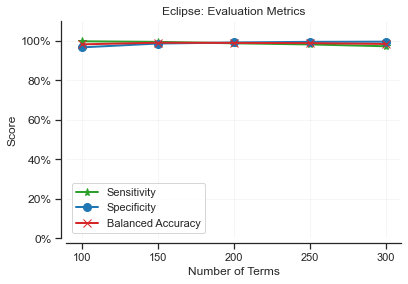

In [15]:
plot_line([100, 150, 200, 250, 300], "Number of Terms", "2", eclipse_metrics_in_train_summarized, "max_term")

# 5. Third Experiment (RQ4.3)

## 5.1 Parameters

| Parameter                  |         Value        |
|----------------------------|:--------------------:|
| Project                    |        Eclipse       |
| Algorithms                 |        SVM |
| Metrics                    | Accuracy |
| Features                   | Description |
| Number of Terms            |        150      |
| Balancing                  |        Smote   |
| Resampling                 |        Repeated CV 5 x 10       |
| Threshold                  |        1, 8, 63, 365       |








Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## 5.2 Review Data

In [16]:
eclipse_metrics_in_train = pd.read_csv("../output/data/20200916_r4_3b_predict_long_lived_bug_train_final.csv", sep=",")
eclipse_metrics_in_train.head()

,tn,fp,fn,tp,Resample,acc,sensitivity,specificity,balanced_acc,project,classifier,balancing,resampling,metric,max_term,feature,threshold,hyper1,value1,hyper2,value2,seed,row
0,592,363,537,403,Fold1.Rep01,0.525,0.429,0.620,0.524,eclipse,svm,smote,repeatedcv5x10,Accuracy,150,long_description,8,sigma,0.031,C,32,144,1
1,621,334,521,418,Fold2.Rep01,0.549,0.445,0.650,0.548,eclipse,svm,smote,repeatedcv5x10,Accuracy,150,long_description,8,sigma,0.031,C,32,144,1
2,613,342,528,411,Fold3.Rep01,0.541,0.438,0.642,0.540,eclipse,svm,smote,repeatedcv5x10,Accuracy,150,long_description,8,sigma,0.031,C,32,144,1
3,619,336,544,395,Fold4.Rep01,0.535,0.421,0.648,0.534,eclipse,svm,smote,repeatedcv5x10,Accuracy,150,long_description,8,sigma,0.031,C,32,144,1
4,615,339,540,399,Fold5.Rep01,0.536,0.425,0.645,0.535,eclipse,svm,smote,repeatedcv5x10,Accuracy,150,long_description,8,sigma,0.031,C,32,144,1


In [17]:
eclipse_metrics_in_train[['classifier', 'threshold']].value_counts()

classifier  threshold
svm         365          50
            102          50
            59           50
            8            50
dtype: int64

In [18]:
eclipse_metrics_in_train_summarized = eclipse_metrics_in_train.groupby(['classifier', 'feature', 'balancing', 'metric', 'max_term', 'threshold']).agg({'sensitivity': 'mean', 'specificity':'mean', 'balanced_acc': 'mean'})
eclipse_metrics_in_train_summarized = eclipse_metrics_in_train_summarized.reset_index()
eclipse_metrics_in_train_summarized.sort_values('balanced_acc', ascending=False)

,classifier,feature,balancing,metric,max_term,threshold,sensitivity,specificity,balanced_acc
3,svm,long_description,smote,Accuracy,150,365,0.994,0.985,0.989
2,svm,long_description,smote,Accuracy,150,102,0.936,0.939,0.937
1,svm,long_description,smote,Accuracy,150,59,0.740,0.913,0.827
0,svm,long_description,smote,Accuracy,150,8,0.432,0.644,0.538


## 5.3 Evaluation Metrics

<ipython-input-14-f41e5573a59f>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-14-f41e5573a59f>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


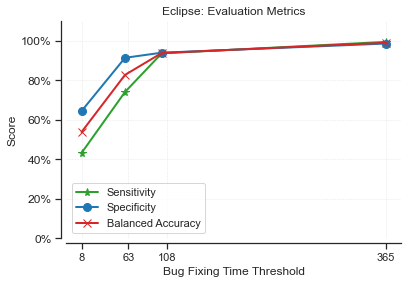

In [19]:
plot_line([8, 63, 108, 365], "Bug Fixing Time Threshold", "3", eclipse_metrics_in_train_summarized, "threshold")

# 6. Fourth Experiment

## 6.1 Parameters

| Parameter                  |         Value        |
|----------------------------|:--------------------:|
| Project                    |        Eclipse, Freedesktop, Gcc, Gnome, Mozilla, WineHQ       |
| Algorithms                 |        NN |
| Metrics                    | Accuracy |
| Features                   | Long Description |
| Number of Terms            |        150       |
| Balancing                  |        Smote   |
| Resampling                 |        Repeated CV 5 x 2       |
| Threshold                  |        365       |








Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**.

## 6.2 Review Data

In [21]:
eclipse_metrics_in_train = pd.read_csv("../output/data/20200919_r4_4b_predict_long_lived_bug_train_final.csv", sep=",")
eclipse_metrics_in_train.head()

,tn,fp,fn,tp,Resample,acc,sensitivity,specificity,balanced_acc,project,classifier,balancing,resampling,metric,max_term,feature,threshold,hyper1,value1,hyper2,value2,seed,row
0,1294,22,4,1256,Fold1.Rep01,0.990,0.997,0.983,0.990,eclipse,svm,smote,repeatedcv5x10,Accuracy,150,long_description,365,sigma,0.031,C,32,144,1
1,1294,21,8,1252,Fold2.Rep01,0.989,0.994,0.984,0.989,eclipse,svm,smote,repeatedcv5x10,Accuracy,150,long_description,365,sigma,0.031,C,32,144,1
2,1300,16,7,1253,Fold3.Rep01,0.991,0.994,0.988,0.991,eclipse,svm,smote,repeatedcv5x10,Accuracy,150,long_description,365,sigma,0.031,C,32,144,1
3,1299,17,10,1250,Fold4.Rep01,0.990,0.992,0.987,0.990,eclipse,svm,smote,repeatedcv5x10,Accuracy,150,long_description,365,sigma,0.031,C,32,144,1
4,1287,28,15,1245,Fold5.Rep01,0.983,0.988,0.979,0.983,eclipse,svm,smote,repeatedcv5x10,Accuracy,150,long_description,365,sigma,0.031,C,32,144,1


In [22]:
eclipse_metrics_in_train[['classifier', 'project']].value_counts()

classifier  project    
svm         winehq         50
            mozilla        50
            gnome          50
            gcc            50
            freedesktop    50
            eclipse        50
dtype: int64

In [23]:
eclipse_metrics_in_train_summarized = eclipse_metrics_in_train.groupby(['project', 'classifier', 'feature', 'balancing', 'metric', 'max_term', 'threshold']).agg({'sensitivity': 'mean', 'specificity':'mean', 'balanced_acc': 'mean'})
eclipse_metrics_in_train_summarized = eclipse_metrics_in_train_summarized.reset_index()

In [24]:
eclipse_metrics_in_train_summarized.sort_values('balanced_acc', ascending=False)

,project,classifier,feature,balancing,metric,max_term,threshold,sensitivity,specificity,balanced_acc
0,eclipse,svm,long_description,smote,Accuracy,150,365,0.993,0.984,0.989
1,freedesktop,svm,long_description,smote,Accuracy,150,365,0.968,0.962,0.965
3,gnome,svm,long_description,smote,Accuracy,150,365,0.959,0.966,0.962
2,gcc,svm,long_description,smote,Accuracy,150,365,0.960,0.964,0.962
4,mozilla,svm,long_description,smote,Accuracy,150,365,0.935,0.952,0.944
5,winehq,svm,long_description,smote,Accuracy,150,365,0.203,0.863,0.533


## 6.3 Evaluation Train Metrics

<Figure size 432x288 with 0 Axes>

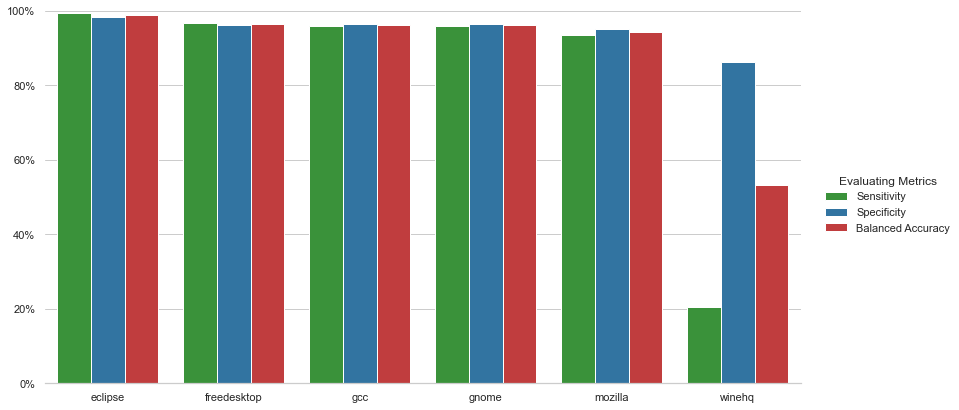

<Figure size 432x288 with 0 Axes>

In [25]:
sns.despine(offset=5)
sns.set(style="whitegrid")
e4_metrics_data_melted = eclipse_metrics_in_train_summarized[['project', 'sensitivity', 'specificity', 'balanced_acc']].melt(id_vars=['project']) 
g = sns.catplot(data=e4_metrics_data_melted
                , kind="bar"
                , x="project"
                , y="value"
                , hue="variable"
                , height=6
                , aspect=2
                , palette=["tab:green", "tab:blue", "tab:red"])
(g.set_axis_labels("", "")
  .set_titles(" SVM Performance")
  .set(ylim=(0,1))
  .despine(left=True))

# Format y scale in percentage format. 
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

# Change and ajust legend. 
box = g.ax.get_position()
g.ax.set_position([box.x0, box.y0, box.width * 0.95, box.height]) # resize position
g._legend.set_title("Evaluating Metrics")
for t, l in zip(g._legend.texts, ['Sensitivity', 'Specificity', 'Balanced Accuracy']): t.set_text(l)

plt.show(g)
plt.savefig("../output/figures/r4e4_svn_performace_algorithms_on_eclipse_dataset.pdf", format="pdf", dpi=600, bbox_inches='tight')

## 6.4 Evaluation Test Metrics

In [26]:
projects_metrics_in_test = pd.read_csv("../output/data/20200919_r4_4b_predict_long_lived_bug_test_final.csv", sep=",")
projects_metrics_in_test.sort_values('project', ascending=True)

,project,feature,max_term,classifier,balancing,resampling,metric,threshold,train_size,train_size_class_0,train_size_class_1,test_size,test_size_class_0,test_size_class_1,tp,fp,tn,fn,sensitivity,specificity,balanced_acc,balanced_acc_manual,precision,recall,fmeasure,seed,row
0,eclipse,long_description,150,svm,smote,repeatedcv5x10,Accuracy,365,12878,6578,6300,2367,2192,175,4,26,2166,171,0.023,0.988,0.505,0.505,0.133,0.023,0.039,144,1
1,freedesktop,long_description,150,svm,smote,repeatedcv5x10,Accuracy,365,9614,4910,4704,1897,1636,261,13,46,1590,248,0.050,0.972,0.511,0.511,0.220,0.050,0.081,144,1
2,gcc,long_description,150,svm,smote,repeatedcv5x10,Accuracy,365,12338,6238,6100,2485,2079,406,16,73,2006,390,0.039,0.965,0.502,0.502,0.180,0.039,0.065,144,1
3,gnome,long_description,150,svm,smote,repeatedcv5x10,Accuracy,365,9171,4941,4230,1929,1647,282,41,36,1611,241,0.145,0.978,0.562,0.562,0.532,0.145,0.228,144,1
5,mozilla,long_description,150,svm,smote,repeatedcv5x10,Accuracy,365,11242,5950,5292,2423,1983,440,33,80,1903,407,0.075,0.960,0.517,0.517,0.292,0.075,0.119,144,1
4,winehq,long_description,150,svm,smote,repeatedcv5x10,Accuracy,365,4539,2691,1848,1512,897,615,135,145,752,480,0.220,0.838,0.529,0.529,0.482,0.220,0.302,144,1


<Figure size 432x288 with 0 Axes>

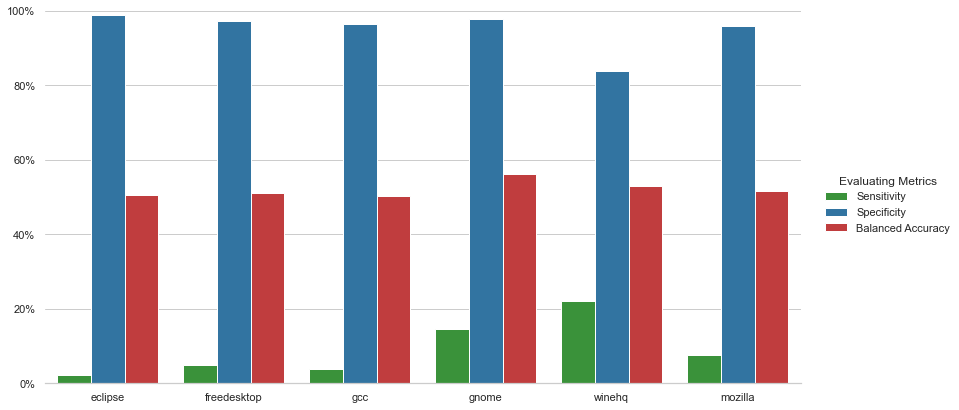

<Figure size 432x288 with 0 Axes>

In [29]:
sns.despine(offset=5)
sns.set(style="whitegrid")
e4_metrics_data_melted = projects_metrics_in_test[['project', 'sensitivity', 'specificity', 'balanced_acc']].melt(id_vars=['project']) 
g = sns.catplot(data=e4_metrics_data_melted
                , kind="bar"
                , x="project"
                , y="value"
                , hue="variable"
                , height=6
                , aspect=2
                , palette=["tab:green", "tab:blue", "tab:red"])
(g.set_axis_labels("", "")
  .set_titles(" SVM Performance")
  .set(ylim=(0,1))
  .despine(left=True))

# Format y scale in percentage format. 
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

# Change and ajust legend. 
box = g.ax.get_position()
g.ax.set_position([box.x0, box.y0, box.width * 0.95, box.height]) # resize position
g._legend.set_title("Evaluating Metrics")
for t, l in zip(g._legend.texts, ['Sensitivity', 'Specificity', 'Balanced Accuracy']): t.set_text(l)
g
plt.show()
plt.savefig("../output/figures/r4e4_svm_performace_algorithms_on_eclipse_dataset_in_test.pdf", format="pdf", dpi=600, bbox_inches='tight')

## 6.4 Evaluation Test Metrics

In [114]:
from pandas import DataFrame

metrics = {'dataset': ['Eclipse', 'Freedesktop', 'Gnome', 'Mozilla', 'Gcc', 'WineHQ'],
        '% of Long-Lived Bugs': [7.7, 13.6, 14.4, 18.1, 29.2, 40.7],
        'Balanced Accuracy (%)': [50.5, 51.1, 50.2, 56.2, 51.7, 52.9]}

df = DataFrame(metrics)

print (df) 

       dataset  % of Long-Lived Bugs  Balanced Accuracy (%)
0      Eclipse                 7.700                 50.500
1  Freedesktop                13.600                 51.100
2        Gnome                14.400                 50.200
3      Mozilla                18.100                 56.200
4          Gcc                29.200                 51.700
5       WineHQ                40.700                 52.900


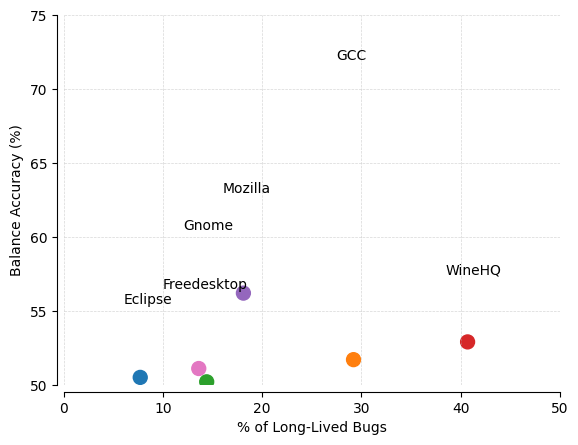

In [115]:
plt.rc('figure', figsize=(20, 20))
plt.style.use('default')

x=df['% of Long-Lived Bugs']
y=df['Balanced Accuracy (%)']

plt.scatter(x, y, s=100, color=['tab:blue', 'tab:pink', 'tab:green', 'tab:purple', 'tab:orange', 'tab:red'])
plt.xlim(0,50)
plt.ylim(50, 75)
plt.text(6, 55.5, 'Eclipse')
plt.text(10, 56.5, 'Freedesktop')
plt.text(12, 60.5, 'Gnome')
plt.text(16, 63.0, 'Mozilla')
plt.text(27.5, 72, 'GCC')
plt.text(38.5, 57.5, 'WineHQ')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.xlabel('% of Long-Lived Bugs')
plt.ylabel('Balance Accuracy (%)')

sns.despine(offset=5, trim=True)


## 6.4 Tests Results

In [116]:
e4_tests_data = pd.read_csv(e4_tests_path)
bug_reports_data = pd.read_csv(bug_reports_gcc_path)
test_e4_merged_data = pd.merge(
    bug_reports_data,
    e4_tests_data[['bug_id', 'long_lived', 'y_hat']],
    left_on='bug_id',
    right_on='bug_id',
    how='inner'
)
correct_predicted_bugs = test_e4_merged_data.query('long_lived == "Y" and y_hat == "N"')
#correct_predicted_bugs.head()
correct_predicted_bugs.groupby('long_lived')['long_lived'].agg(['count'])

NameError: name 'e4_tests_path' is not defined